First 10 warehouses with cluster labels:
   daily_shipments  dist_main_dc  inventory_turnover  labor_cost  \
0         0.374540      0.950714            0.731994    0.598658   
1         0.156019      0.155995            0.058084    0.866176   
2         0.601115      0.708073            0.020584    0.969910   
3         0.832443      0.212339            0.181825    0.183405   
4         0.304242      0.524756            0.431945    0.291229   
5         0.611853      0.139494            0.292145    0.366362   
6         0.456070      0.785176            0.199674    0.514234   
7         0.592415      0.046450            0.607545    0.170524   
8         0.065052      0.948886            0.965632    0.808397   
9         0.304614      0.097672            0.684233    0.440152   

   cluster_label  
0              0  
1              1  
2              1  
3              2  
4              0  
5              2  
6              1  
7              0  
8              0  
9              0  


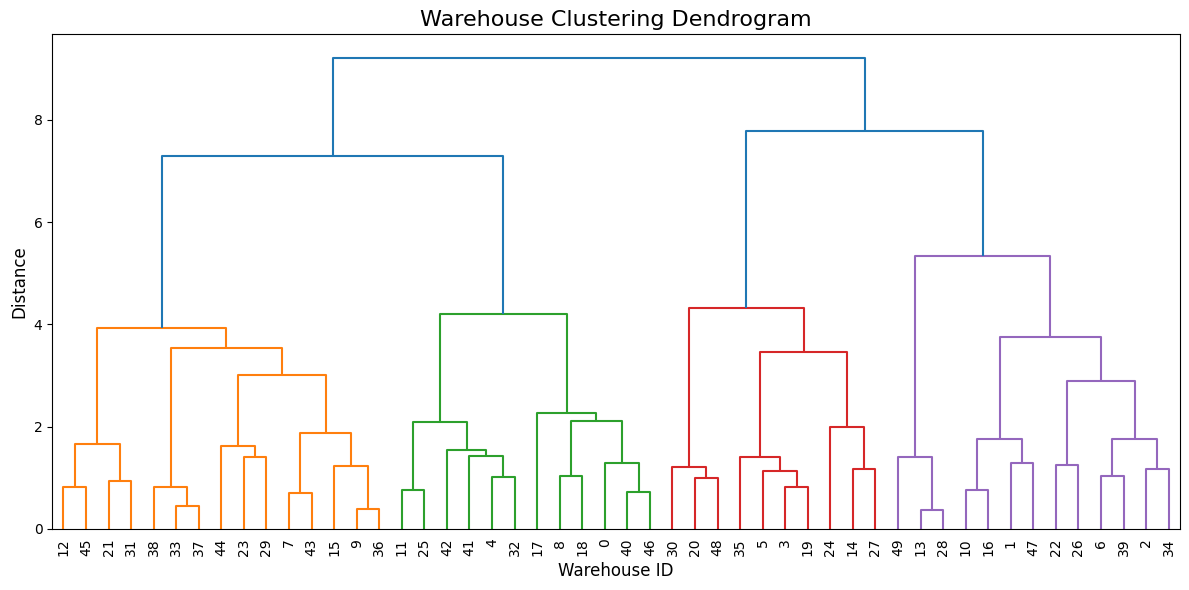

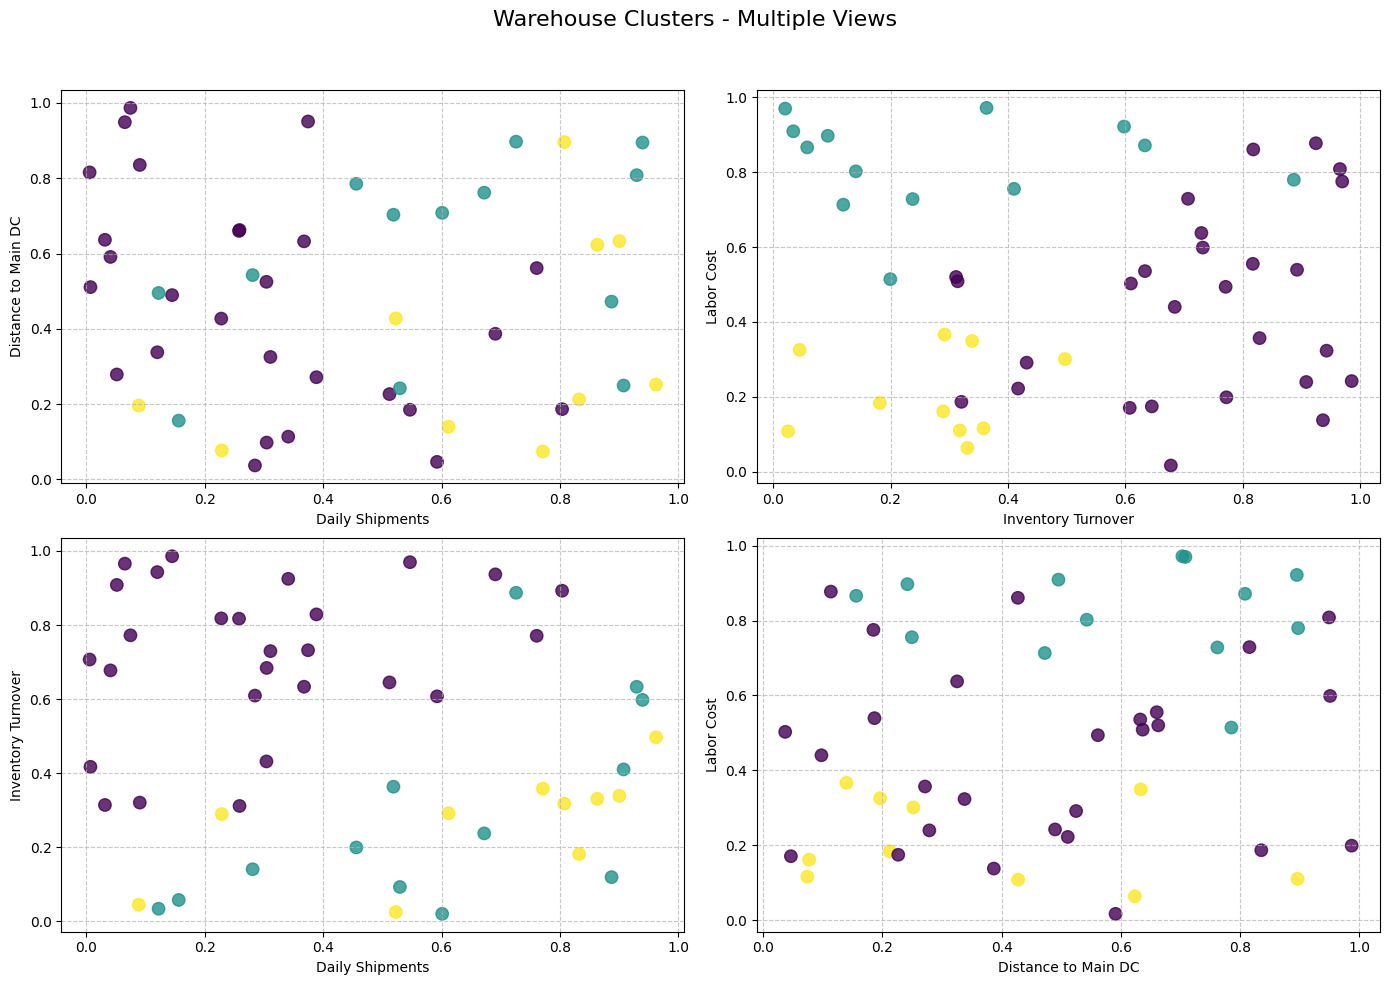


Cluster Analysis:
               daily_shipments  dist_main_dc  inventory_turnover  labor_cost
cluster_label                                                               
0                     0.294771      0.471283            0.716870    0.442280
1                     0.594360      0.593475            0.292030    0.823158
2                     0.658900      0.353065            0.267801    0.208378

Cluster Variances:
               daily_shipments  dist_main_dc  inventory_turnover  labor_cost
cluster_label                                                               
0                     0.054554      0.081251            0.043827    0.058466
1                     0.081778      0.064972            0.073478    0.016156
2                     0.087565      0.078477            0.021022    0.013241

Results exported to 'warehouse_clusters_results.csv'


In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. DATA CREATION
np.random.seed(42)  # For reproducibility
warehouse_data = np.random.rand(50, 4)
df = pd.DataFrame(warehouse_data, 
                  columns=['daily_shipments','dist_main_dc','inventory_turnover','labor_cost'])

# 1b. SCALE THE DATA (recommended for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

# 2. HIERARCHICAL CLUSTERING
# The correct parameter is 'metric' instead of 'affinity' in newer scikit-learn versions
clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = clustering_model.fit_predict(df_scaled)  # Using scaled data
df['cluster_label'] = labels

print("First 10 warehouses with cluster labels:")
print(df.head(10))

# 3. DENDROGRAM VISUALIZATION
Z = linkage(df_scaled, method='ward')  # Using scaled data

plt.figure(figsize=(12, 6))
plt.title("Warehouse Clustering Dendrogram", fontsize=16)
plt.xlabel("Warehouse ID", fontsize=12)
plt.ylabel("Distance", fontsize=12)

# Plot with improved appearance
dendrogram(
    Z,
    leaf_rotation=90.,  # Rotates the labels to be more readable
    leaf_font_size=10.,  # Increases font size for better visibility
    color_threshold=0.7*max(Z[:,2]),  # Adjusts where the coloring threshold is
)
plt.tight_layout()
plt.savefig('warehouse_dendrogram.png')  # Save the figure
plt.show()

# 4. SCATTER PLOT OF CLUSTERS - With Multiple Views
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Warehouse Clusters - Multiple Views', fontsize=16)

# Plot 1: Daily Shipments vs Distance to Main DC
axs[0, 0].scatter(df['daily_shipments'], df['dist_main_dc'], c=df['cluster_label'], cmap='viridis', s=80, alpha=0.8)
axs[0, 0].set_xlabel('Daily Shipments')
axs[0, 0].set_ylabel('Distance to Main DC')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot 2: Inventory Turnover vs Labor Cost
axs[0, 1].scatter(df['inventory_turnover'], df['labor_cost'], c=df['cluster_label'], cmap='viridis', s=80, alpha=0.8)
axs[0, 1].set_xlabel('Inventory Turnover')
axs[0, 1].set_ylabel('Labor Cost')
axs[0, 1].grid(True, linestyle='--', alpha=0.7)

# Plot 3: Daily Shipments vs Inventory Turnover
axs[1, 0].scatter(df['daily_shipments'], df['inventory_turnover'], c=df['cluster_label'], cmap='viridis', s=80, alpha=0.8)
axs[1, 0].set_xlabel('Daily Shipments')
axs[1, 0].set_ylabel('Inventory Turnover')
axs[1, 0].grid(True, linestyle='--', alpha=0.7)

# Plot 4: Distance to Main DC vs Labor Cost
axs[1, 1].scatter(df['dist_main_dc'], df['labor_cost'], c=df['cluster_label'], cmap='viridis', s=80, alpha=0.8)
axs[1, 1].set_xlabel('Distance to Main DC')
axs[1, 1].set_ylabel('Labor Cost')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust for the suptitle
plt.savefig('warehouse_clusters.png')  # Save the figure
plt.show()

# 5. CLUSTER ANALYSIS
print("\nCluster Analysis:")
cluster_analysis = df.groupby('cluster_label').mean()
print(cluster_analysis)

# Add variance analysis to see within-cluster dispersion
print("\nCluster Variances:")
cluster_variance = df.groupby('cluster_label').var()
print(cluster_variance)

# 6. EXPORT RESULTS
df.to_csv('warehouse_clusters_results.csv', index=False)
print("\nResults exported to 'warehouse_clusters_results.csv'")